In [143]:
import pandas as pd
import numpy as np

In [144]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [145]:
data = np.array(raw_data)

In [146]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [147]:
#no_train = 100
no_train = int(0.8*no_of_examples)
no_train

17290

In [148]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1].reshape(-1,1)

In [149]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [150]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std
print(y_std,y_mean)

366164.044034 533343.832331


In [151]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        np.random.seed(4)
        self.W = np.random.randn(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
    
    def train_abs_err(self,lr=0.1):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        abs_err = np.absolute(err)
        loss = np.sum(abs_err)/self.N
        
        grad = np.where(err>=0,self.X,-self.X)
        grad = np.mean(grad,axis=0)
        grad = grad.reshape((grad.shape[0],1))
        gradb = np.where(err>=0,1,-1)
        gradb = np.mean(gradb)

        self.W -= lr*grad
        self.b -= lr*gradb
        
        return loss
    
    def train_squared_err(self, lr, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def train_cub_err(self,lr=0.1):
        pred = self.X.dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        err3 = err**3

        loss = np.mean(err3,axis=0)
        
        grad = self.X.T.dot(err2)
        grad *= 2/self.N
        gradb = np.sum(err2)*3/self.N
        
        self.W -= lr*grad
        self.b -= lr*gradb
        
        return loss
    
    def evaluate(self,testX):
        return (testX).dot(self.W) + self.b      
        
        
        

In [152]:
'''
no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
RMSE_plot = []
for i in range(no_of_epochs):
    loss = model.train_cub_err(lr=0.005)
    print(loss)
    RMSE_plot.append(loss)
'''

'\nno_of_epochs = 500\nmodel = Linear_model(no_of_features, X_train,y_train)\nRMSE_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_cub_err(lr=0.005)\n    print(loss)\n    RMSE_plot.append(loss)\n'

In [153]:

no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
abs_itr = []
for i in range(no_of_epochs):
    model.train_abs_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    abs_itr.append(test_loss)
abs_itr


534844.833113
526993.442876
519262.086478
511643.440319
504137.08561
496744.306901
489495.772187
482366.823022
475379.00834
468521.024187
461798.496049
455214.48491
448791.926205
442536.698413
436447.781865
430516.994514
424755.347962
419164.497953
413748.312993
408510.313543
403439.796767
398530.914176
393810.32876
389256.748097
384872.013302
380669.507694
376654.75626
372829.283221
369174.89568
365687.133016
362380.178501
359245.038836
356285.950393
353504.06733
350878.927094
348410.590859
346077.564805
343897.624016
341851.031859
339930.225326
338133.720785
336478.614168
334942.344531
333517.067484
332190.647672
330971.665111
329845.06303
328808.288244
327857.802419
326997.221035
326202.59009
325480.293888
324816.927911
324218.346184
323671.557082
323163.405552
322708.146204
322306.715328
321951.107632
321638.275474
321349.397783
321096.185167
320879.932294
320689.574687
320519.142699
320380.262461
320262.34588
320156.738387
320066.347098
319992.577939
319940.534493
319899.168314
31

[534844.83311285591,
 526993.44287623256,
 519262.08647787123,
 511643.44031941815,
 504137.08561033895,
 496744.30690113897,
 489495.77218661696,
 482366.82302242779,
 475379.00833990535,
 468521.02418706834,
 461798.49604863417,
 455214.4849099078,
 448791.92620549182,
 442536.69841278542,
 436447.78186453582,
 430516.99451381888,
 424755.34796152083,
 419164.49795321358,
 413748.31299305923,
 408510.31354286766,
 403439.79676698457,
 398530.91417639377,
 393810.32876008097,
 389256.74809734966,
 384872.01330233755,
 380669.507694264,
 376654.75626008585,
 372829.28322078497,
 369174.89568031387,
 365687.13301551569,
 362380.17850127129,
 359245.03883622587,
 356285.95039284218,
 353504.06732997042,
 350878.92709409067,
 348410.59085919603,
 346077.56480500399,
 343897.62401558203,
 341851.03185916919,
 339930.22532556311,
 338133.72078494774,
 336478.61416789022,
 334942.34453088889,
 333517.06748367689,
 332190.64767219208,
 330971.66511103651,
 329845.06302953494,
 328808.28824362

In [154]:

no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
sqr_itr = []
for i in range(no_of_epochs):
    model.train_squared_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = pred_test*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(i, test_loss)
    sqr_itr.append(test_loss)

0 517171.820172
1 494293.210174
2 473871.199919
3 455650.108188
4 439408.238209
5 424949.426935
6 412097.383446
7 400691.96362
8 390586.755832
9 381647.524438
10 373751.187708
11 366785.105229
12 360646.523951
13 355242.087215
14 350487.35136
15 346306.28264
16 342630.726003
17 339399.848764
18 336559.568429
19 334061.976369
20 331864.769116
21 329930.697654
22 328227.043013
23 326725.124205
24 325399.842363
25 324229.263059
26 323194.237222
27 322278.059889
28 321466.165154
29 320745.855117
30 320106.060266
31 319537.12856
32 319030.64049
33 318579.247383
34 318176.530435
35 317816.878053
36 317495.379335
37 317207.731686
38 316950.16079
39 316719.351335
40 316512.387091
41 316326.69909
42 316160.020817
43 316010.349471
44 315875.912454
45 315755.138379
46 315646.631976
47 315549.152349
48 315461.594124
49 315382.971097
50 315312.402015
51 315249.098224
52 315192.352902
53 315141.531668
54 315096.064393
55 315055.438022
56 315019.190294
57 314986.904231
58 314958.203288
59 314932.7470

In [155]:
lrs = [0.001,0.002,0.005,0.01,0.02,0.05,0.08,0.1]

In [156]:
no_of_epochs = 500
abs_plot = []
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train_abs_err(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    abs_plot.append(test_loss)
abs_plot

[468762.39537530631,
 409021.45023211912,
 327429.47466622951,
 320416.47061769903,
 322761.27362500841,
 323221.873337959,
 323229.04881501012,
 323228.52408737253]

In [157]:
no_of_epochs = 500
sqr_plot = []
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train_squared_err(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    sqr_plot.append(test_loss)
sqr_plot

[384822.03276650538,
 335879.80914233706,
 315536.25931727904,
 314833.2722923088,
 314932.55797771085,
 314935.64267193066,
 314935.642707108,
 314935.64270710829]

In [158]:
'''
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
sqr_plot = []
for i in range(no_of_epochs):
    loss = model.train_squared_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    sqr_plot.append(test_loss)
'''

'\nno_of_epochs = 300\nmodel = Linear_model(no_of_features, X_train,y_train)\nsqr_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_squared_err(lr=0.05)\n    pred_test = model.evaluate(X_test)\n    pred_test = (pred_test)*y_std + y_mean\n    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])\n    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))\n    print(test_loss)\n    sqr_plot.append(test_loss)\n'

In [159]:
no_of_epochs = 500
cub_plot = []
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train_cub_err(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    cub_plot.append(test_loss)
cub_plot

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in square
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in power


[nan, nan, nan, nan, nan, nan, nan, nan]

In [160]:
'''
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
cub_plot = []
for i in range(no_of_epochs):
    loss = model.train_cub_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    cub_plot.append(test_loss)
'''

'\nno_of_epochs = 300\nmodel = Linear_model(no_of_features, X_train,y_train)\ncub_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_cub_err(lr=0.05)\n    pred_test = model.evaluate(X_test)\n    pred_test = (pred_test)*y_std + y_mean\n    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])\n    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))\n    print(test_loss)\n    cub_plot.append(test_loss)\n'

In [161]:
import matplotlib.pyplot as plt

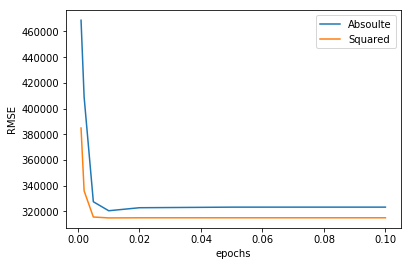

In [162]:
%matplotlib inline
abs_, = plt.plot(lrs,abs_plot)
sqr_, = plt.plot(lrs,sqr_plot)
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.legend([abs_, sqr_],["Absoulte","Squared"])

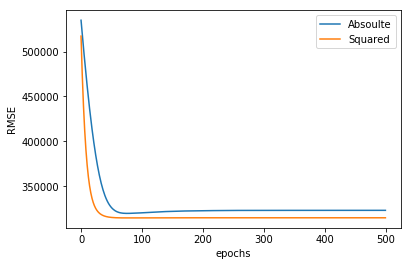

In [163]:
abss_, = plt.plot(range(500),abs_itr[:500])
sqrs_, = plt.plot(range(500),sqr_itr)
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.legend([abss_, sqrs_],["Absoulte","Squared"])